In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# df = pd.read_csv('machine-learning-ex1/ex1/ex1data1.txt')

In [5]:
datafile = np.loadtxt('machine-learning-ex1/ex1/ex1data1.txt', delimiter=',')

print("The shape of the data is: {}".format(datafile.shape))

X = datafile[:, 0]
y = datafile[:, 1]
m = X.shape[0]

np.reshape(X, (len(X), ))

print(X.shape)

The shape of the data is: (97, 2)
(97,)


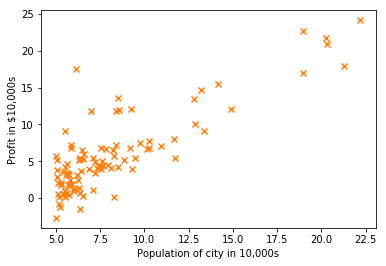

In [200]:
plt.scatter(X, y, marker='x')
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.show()

In [201]:
# add a column of 1's to the training data for the bias unit
bias = np.ones((m, 1))
X = np.column_stack((bias, X))

In [202]:
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [270]:
random_gen = np.random.RandomState(1)
theta = random_gen.normal(loc = 0.0, scale = 0.01, size =(X.shape[1],))

alpha = 0.01
iterations = 1500

IndexError: tuple index out of range

### Computing the cost

In [182]:
def cost(X, y, theta):
    total = 0
    for xi, target in zip(X, y):
        sq_error = (hypothesis(xi, theta) - target)**2
        total += sq_error
    cost = float(total) / (2*len(y))
    return cost
    
def hypothesis(xi, theta):
    return np.dot(xi, theta)

In [183]:
print(cost(X, y, theta))

32.3783839234


### Applying gradient descent

In [272]:
def gradient_descent(X, y, theta, alpha, iterations):
    J_history = []
    m = float(len(y))
    weights = theta[:]
    for iteration in range(iterations):
        hx = np.dot(X, weights)
        errors = hx - y
        weights -= (alpha/m) * X.T.dot(errors)
        cost = ((errors**2).sum()) / (2*m)
        J_history.append(cost)
    return J_history, weights

In [191]:
costs = []
costs, weights = gradient_descent(X, y, theta, alpha=0.01, iterations=1000)

print("Weights found by gradient descent: {0}".format(weights))

print("\nExpected weights from Andrew Ng's R model: [-3.6303 1.1664]")

Weights found by gradient descent: [-3.87797674  1.19124503]

Expected weights from Andrew Ng's R model: [-3.6303 1.1664]


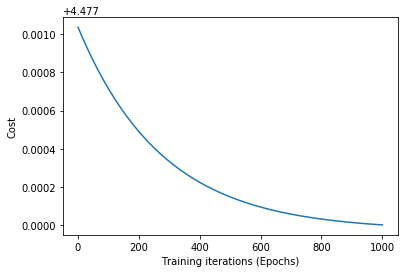

In [192]:
plt.figure()
plt.plot(range(1, len(costs) + 1), costs)
plt.ylabel("Cost")
plt.xlabel("Training iterations (Epochs)")
plt.show()

Success! The cost appears to correctly decrease with increasing training iterations.

### Lets visualise the linear fit on our original training data:

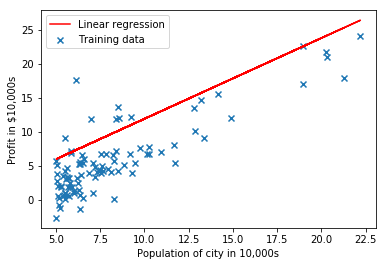

In [219]:
plt.figure()
plt.scatter(X[:, 1], y, marker='x')
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.plot(X[:, 1], (X*weights)[:, 1], c='r')
plt.legend(["Linear regression", "Training data"])
plt.show()

### We can also make some predictions for profits using our linear regression model:

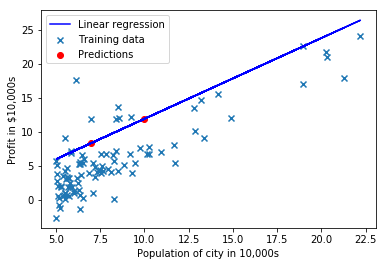

In [222]:
# make predictions for population sizes 70,000 and 100,000 
populations = np.array([[1, 7.0], [1, 10.0]])
predictions = populations * weights

# plot original plus new predictions
plt.figure()
plt.scatter(X[:, 1], y, marker='x')
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.plot(X[:, 1], (X*weights)[:, 1], c='b')
plt.scatter(populations[:, 1], predictions[:, 1], c='r', marker='o')
plt.legend(["Linear regression", "Training data", "Predictions"])
plt.show()

As can be seen, the predicted points are shown precisely on the linear regression line.

### Rough working with matrices and dot products to help get my head round the calculations determined within gradient descent

In [13]:
# tests for confirmation
for xi, target in zip(X, y):
    print(np.dot(theta.T, xi))

# calculating the matrix-vector multiplication between our feature matrix and error vector
print(X.T.dot(np.dot(X, theta) - y) * 0.01)

[ -5.69662541 -63.72347125]


In [27]:
print(np.dot(X,theta))

[-0.02113547 -0.01757261 -0.03586963 -0.02659907 -0.01960425 -0.03503947
 -0.0294939  -0.03623362 -0.02343629 -0.01467839 -0.01869212 -0.07040572
 -0.01883466 -0.03519547 -0.01826389 -0.01666537 -0.02269729 -0.01514026
 -0.02309004 -0.02701262 -0.02161876 -0.10775957 -0.01734259 -0.02245687
 -0.01780018 -0.0996538  -0.06223266 -0.0507867  -0.06436157 -0.11958482
 -0.01588844 -0.02406762 -0.040333   -0.01980001 -0.03398848 -0.03228963
 -0.03328373 -0.01805345 -0.0622816  -0.02262388 -0.0168336  -0.02586068
 -0.05538099 -0.01907753 -0.03162465 -0.02714904 -0.01477382 -0.01924698
 -0.05533205 -0.01765764 -0.0298842  -0.01622674 -0.02917273 -0.030269
 -0.02249786 -0.02265752 -0.02213937 -0.01825777 -0.04071229 -0.04158955
 -0.0377465  -0.01544125 -0.11393219 -0.07495719 -0.09973944 -0.02791435
 -0.03450235 -0.04637593 -0.01739948 -0.10819392 -0.04576418 -0.02862582
 -0.02049986 -0.02796145 -0.01450893 -0.02381374 -0.02987442 -0.01456766
 -0.0466084  -0.01500323 -0.01880529 -0.01549692 -0.0

In [16]:
print(X.T)

[[ 1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.    ]
 [ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
   5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
   6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
  10.957  13.176  22

In [18]:
print(X.T.dot(np.dot(X,theta) - y))

[ -569.66254068 -6372.34712461]


In [24]:
array_1 = np.array([[1, 2, 3, 4, 5], [2, 3, 4, 5, 6]])

In [25]:
array_2 = np.array([2, 2, 2, 2, 2])

In [26]:
array_1.dot(array_2)

array([30, 40])

### Testing of the models on the second dataset - multivariate linear regression

In [273]:
datafile = np.loadtxt('machine-learning-ex1/ex1/ex1data2.txt', delimiter=',')

print("The shape of the data is: {}".format(datafile.shape))

X = datafile[:, :2]
y = datafile[:, 2]
m = X.shape[0]

The shape of the data is: (47, 3)


In [274]:
print(X[:5])
print(y[:5])
print(np.mean(X, axis=0))

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
[399900. 329900. 369000. 232000. 539900.]
[2000.68085106    3.17021277]


In [275]:
def feature_normalise(X):
    X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis = 0)
    return X_norm

In [276]:
X_std = feature_normalise(X)

In [280]:
# add a column of 1's to the training data for the bias unit
bias = np.ones((m, 1))
X_std = np.column_stack((bias, X_std))

random_gen = np.random.RandomState(1)
theta = random_gen.normal(loc = 0.0, scale = 0.01, size =(X.shape[1],))

alpha = 0.01
iterations = 1500

In [283]:
costs, weights = gradient_descent(X, y, theta, alpha=0.01, iterations=5)

print("Weights found by gradient descent: {0}".format(weights))

Weights found by gradient descent: [1.54572513e+72 2.23253955e+69]


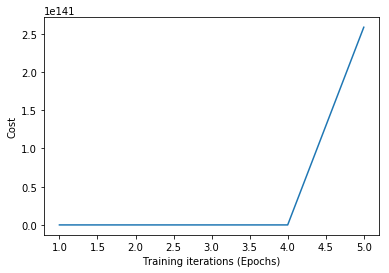

In [284]:
plt.figure()
plt.plot(range(1, len(costs) + 1), costs)
plt.ylabel("Cost")
plt.xlabel("Training iterations (Epochs)")
plt.show()

--- 
# Normal equation method

This method has the advantage of not requiring any standardisation of 

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafile = np.loadtxt('machine-learning-ex1/ex1/ex1data1.txt', delimiter=',')

print("The shape of the data is: {}".format(datafile.shape))

X = datafile[:, 0]
y = datafile[:, 1]
m = X.shape[0]

# add a column of 1's to the training data for the bias unit
bias = np.ones((m, 1))
X = np.column_stack((bias, X))

The shape of the data is: (97, 2)


In [10]:
def normal_equation(X, y):
    inner_prod = np.dot(X.T, X) 
    prod_inv = np.linalg.inv(inner_prod)
    prod = np.dot(prod_inv, X.T)
    theta = np.dot(prod, y)
    return theta

In [11]:
theta = normal_equation(X, y)

print("Weights found by normal equation: {0}".format(theta))

print("\nExpected weights from Andrew Ng's R model: [-3.6303 1.1664]")

Weights found by normal equation: [-3.89578088  1.19303364]

Expected weights from Andrew Ng's R model: [-3.6303 1.1664]


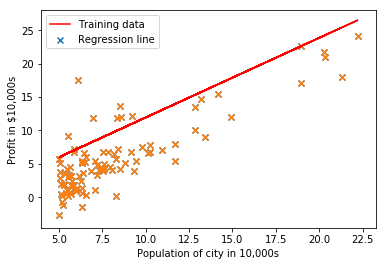

In [15]:
plt.scatter(X[:, 1], y, marker='x')
plt.plot(X[:, 1], (X*theta)[:, 1], c='r')
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.legend(["Training data", "Regression line"])
plt.show()

As we can see, this line almost exactly matches that from the previous linear regression obtained using gradient descent.

In [18]:
def check(x, position):
    if x != position and x > position:
        while x != position:
            position += 1
            print(position)
            
    elif x != position and x < position:
        while x != position:
            position -= 1
            print(position)
    
    else:
        print("Position is already at the chosen location!")

In [19]:
check(12, 3)

4
5
6
7
8
9
10
11
12


In [20]:
check(3, 7)

6
5
4
3


In [24]:
check(7, 7)

Position is already at the chosen location!


In [25]:
check(-3, 4)

3
2
1
0
-1
-2
-3
